# Introduction

In this part of the project, I'm going to estimate player's value based on his: overall, potential, age and wage. I'm going to use and compare some different machine learning models from sklearn, and my own implementation of linear regression using: closed formula, gradient descent and pytorch.

## Loading dataset

In [ ]:
import pandas as pd
import os

def read_data(file_path: str) -> pd.DataFrame:
    if not os.path.isfile(file_path):
        raise Exception(f'File {file_path} doesn\'t exist')
    else:
        data = pd.read_csv(file_path,
                           usecols=['sofifa_id',
                                    'short_name',
                                    'player_positions',
                                    'overall',
                                    'potential',
                                    'value_eur',
                                    'wage_eur',
                                    'age',
                                    'height_cm',
                                    'weight_kg',
                                    'club_name',
                                    'league_name',
                                    'nationality_name',
                                    'preferred_foot',
                                    'pace',
                                    'shooting',
                                    'passing',
                                    'dribbling',
                                    'defending',
                                    'physic'])
        print('File loaded succesfully')

    data.set_index(['sofifa_id', 'short_name'], inplace=True)
    data['player_positions'] = data['player_positions'].apply(lambda x: x.split(', '))
    return data

df = read_data("players_22.csv")

File loaded succesfully


## Dataset description:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19239 entries, (np.int64(158023), 'L. Messi') to (np.int64(264540), 'E. Lalchhanchhuaha')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_positions  19239 non-null  object 
 1   overall           19239 non-null  int64  
 2   potential         19239 non-null  int64  
 3   value_eur         19165 non-null  float64
 4   wage_eur          19178 non-null  float64
 5   age               19239 non-null  int64  
 6   height_cm         19239 non-null  int64  
 7   weight_kg         19239 non-null  int64  
 8   club_name         19178 non-null  object 
 9   league_name       19178 non-null  object 
 10  nationality_name  19239 non-null  object 
 11  preferred_foot    19239 non-null  object 
 12  pace              17107 non-null  float64
 13  shooting          17107 non-null  float64
 14  passing           17107 non-null  float64
 15  dribbling         17107

In [6]:
df.describe(include='all')

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,nationality_name,preferred_foot,pace,shooting,passing,dribbling,defending,physic
count,19239,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178,19178,19239,19239,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000
unique,674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701,55,163,2,NaN,NaN,NaN,NaN,NaN,NaN
top,[CB],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Betis Balompié,USA Major League Soccer,England,Right,NaN,NaN,NaN,NaN,NaN,NaN
freq,2423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,771,1719,14674,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,NaN,NaN,NaN,NaN,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289
std,NaN,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,NaN,NaN,NaN,NaN,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886
min,NaN,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,NaN,NaN,NaN,NaN,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000
25%,NaN,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,NaN,NaN,NaN,NaN,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000
50%,NaN,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,NaN,NaN,NaN,NaN,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000
75%,NaN,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,NaN,NaN,NaN,NaN,76.000000,63.000000,64.000000,69.000000,64.000000,72.000000


## Preparing data:

In [7]:
X = df[['overall', 'potential', 'age', 'wage_eur']].values
y = df['value_eur'].values

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

y_imputer = SimpleImputer(strategy='median')
y = y_imputer.fit_transform(y.reshape(-1,1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Helper functions:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def MSE(y_pred, y_true):
    return np.mean((y_true - y_pred)**2)

# Stage 1 - Testing sklearn models from sklearn using Pipelines

In this stage, I am going to use sklearn Pipeline to test 3 different ML models from sklearn:
* Linear regression (sklearn.linear_model.LinearRegression)
* Random forest regressor (sklearn.ensemble.RandomForestRegressor)
* SVR (sklearn.svm.SVR)

In [10]:
mse_results = {}
rmse_results = {}

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

regression_sk_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

In [12]:
regression_sk_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [13]:
y_preds = regression_sk_pipeline.predict(X_test)

linreg_sk_mse = MSE(y_preds, y_test)
mse_results["Linear Regression - sklearn"] = linreg_sk_mse

## Random Forest Regressor

### Pipeline i trening

In [14]:
from sklearn.ensemble import RandomForestRegressor

forest_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('randomforest', RandomForestRegressor(random_state=42))
])

In [15]:
forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('randomforest', RandomForestRegressor(random_state=42))])

In [16]:
y_preds = forest_pipeline.predict(X_test)

rfr_mse = MSE(y_preds, y_test)
mse_results["Random Forest Regressor"] = rfr_mse

### Displaying attributes importance

overall -> 0.7049
potential -> 0.2388
age -> 0.0394
wage_eur -> 0.0168


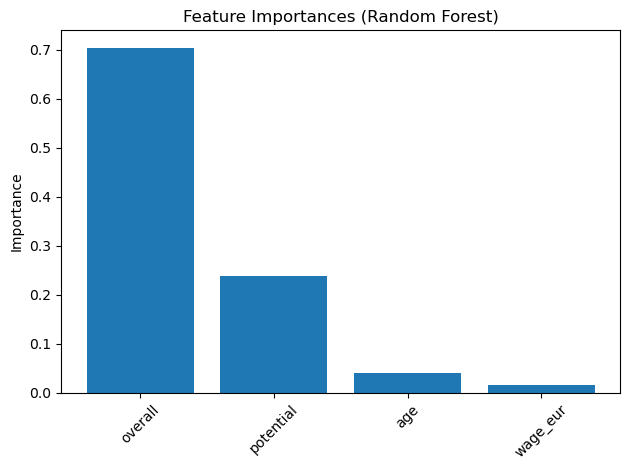

In [17]:
rf = forest_pipeline.named_steps['randomforest']
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = ['overall','potential','age','wage_eur']

indices = np.argsort(importances)[::-1]
for i in indices:
    print(f"{feature_names[i]} -> {importances[i]:.4f}")

plt.figure()
plt.bar([feature_names[i] for i in indices],
        importances[indices])
plt.ylabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## SVR

In [18]:
from sklearn.svm import SVR

svr_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='linear'))
])

y_scaler = StandardScaler()
y_train_svr = y_scaler.fit_transform(y_train.reshape(-1,1))
y_test_svr = y_scaler.fit_transform(y_test.reshape(-1,1))

In [19]:
svr_pipeline.fit(X_train, y_train_svr)

/home/damian/miniconda3/envs/cuda_test_wsl/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])

In [20]:
y_preds = svr_pipeline.predict(X_test)

y_pred = y_scaler.inverse_transform(y_preds.reshape(-1,1)).ravel()

svr_mse = MSE(y_test, y_pred)
mse_results["SVR"] = svr_mse

## Data comparison

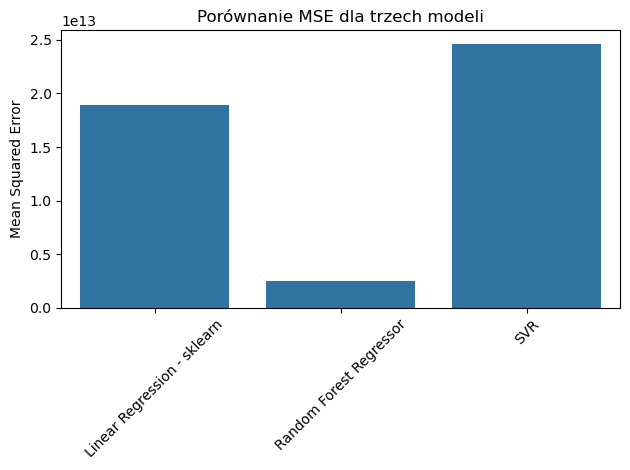

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x=mse_results.keys(), y=mse_results.values())
plt.ylabel('Mean Squared Error')
plt.title('Porównanie MSE dla trzech modeli')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Stage 2 - My own Linear regression implementation (using NumPy only)

I'm going to use classes to implement models, each model is going to use fit and predict function, so that I will be able to use it inside sklearn pipelines.

In [22]:
mse_results_combined = {}
mse_results_combined["SkLearn"] = linreg_sk_mse

## Linear regression using closed formula

In [23]:
class ClosedFormulaLinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        y = y.reshape(-1, 1)
        X_b = np.c_[np.ones((m,1)), X]
        self.theta = np.linalg.pinv(X_b) @ y

        return self

    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m,1)), X]
        preds = X_b @ self.theta
        return preds.ravel()

In [24]:
regression_cf_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regression', ClosedFormulaLinearRegression())
])

In [25]:
regression_cf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('regression',
                 <__main__.ClosedFormulaLinearRegression object at 0x721cf13e4830>)])

In [26]:
y_preds = regression_cf_pipeline.predict(X_test)

linreg_cf_mse = MSE(y_preds, y_test)
mse_results_combined["Closed formula"] = linreg_cf_mse

/home/damian/miniconda3/envs/cuda_test_wsl/lib/python3.13/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


## Linear regression using gradient descent

In [27]:
import numpy as np
from sklearn.utils import shuffle

class GradientDescentLinearRegression:
    def __init__(self, lr=0.01, n_epochs=100, batch_size=32):
        self.lr = lr
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]
        y = y.reshape(-1, 1)
        self.theta = np.zeros((n + 1, 1))

        for epoch in range(self.n_epochs):
            X_shuffled, y_shuffled = shuffle(X_b, y)
            for start in range(0, m, self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                y_pred = X_batch @ self.theta
                error = y_pred - y_batch

                grad = (2 / y_batch.shape[0]) * (X_batch.T @ error)

                self.theta -= self.lr * grad

        return self

    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        predictions = X_b @ self.theta
        return predictions.ravel()


In [28]:
regression_gd_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regression', GradientDescentLinearRegression(lr=0.01, batch_size=64))
])

In [29]:
regression_gd_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('regression',
                 <__main__.GradientDescentLinearRegression object at 0x721cf13e46e0>)])

In [30]:
y_preds = regression_gd_pipeline.predict(X_test)

linreg_gd_mse = MSE(y_preds, y_test)
mse_results_combined["Gradient descent"] = linreg_gd_mse

/home/damian/miniconda3/envs/cuda_test_wsl/lib/python3.13/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


## Data comparison (also with sklearn model)

Model: SkLearn, MSE: 18896185035000.156
Model: Closed formula, MSE: 18896185035000.164
Model: Gradient descent, MSE: 18831432382004.258


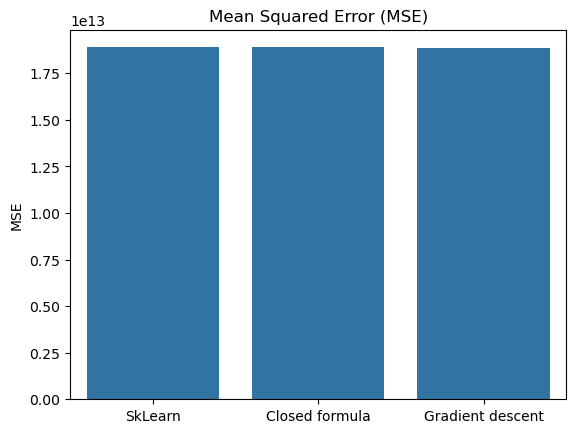

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

for key, value in mse_results_combined.items():
    print(f"Model: {key}, MSE: {value}")


sns.barplot(
    x=list(mse_results_combined.keys()),
    y=list(mse_results_combined.values())
)
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.show()

# Etap 3 - Linear regression using PyTorch

## Defining model and data preparation

In [32]:
import torch
from torch import nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
class LinearRegressionModel(nn.Module):
    def __init__(self, n_features: int):
        super().__init__()
        self.linear = nn.Linear(n_features, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

In [34]:
def train(model, train_dataloader, val_dataloader, optimizer, loss_fn, device='cpu', epochs = 100):
  model = model.to(device)
  for epoch in range(1, epochs + 1):
        model.train()
        train_loss = 0.0
        for xb, yb in train_dataloader:
          xb = xb.to(device)
          yb = yb.to(device)
          optimizer.zero_grad()
          preds = model(xb)
          loss = loss_fn(preds, yb)
          loss.backward()
          optimizer.step()

          train_loss += loss.item() * xb.size(0)
        train_loss /= len(train_dataloader.dataset)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for xb, yb in val_dataloader:
              xb = xb.to(device)
              yb = yb.to(device)
              preds = model(xb)
              loss = loss_fn(preds, yb)
              val_loss += loss.item() * xb.size(0)
        val_loss /= len(val_dataloader.dataset)

        if epoch % 10 == 0:
          print(f"Epoch {epoch:02d}/{epochs}  "
                f"Train Loss: {train_loss:.4f}  "
                f"Val Loss:   {val_loss:.4f}")

Now I'm going to divide the dataset into 3 subsets:
* train - training dataset: 60%
* val - validation dataset: 20%
* test - test dataset: 20%

In [35]:
transform_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_scaled = transform_pipeline.fit_transform(X.astype(np.float32))

X_t = torch.from_numpy(X_scaled)
y_t = torch.from_numpy(y.reshape(-1,1).astype(np.float32))

X_temp, X_test, y_temp, y_test = train_test_split(
    X_t, y_t,
    test_size=0.2,
    random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,
    random_state=42
)

In [36]:
BATCH_SIZE = 64

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

## Training the model

In [37]:
n_features = X_train.shape[1]
model_cpu = LinearRegressionModel(n_features)
optimizer_cpu = torch.optim.SGD(model_cpu.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

In [38]:
import time

start = time.time()
train(model_cpu, train_dataloader, val_dataloader, optimizer_cpu, loss_fn, 'cpu')
end = time.time()

cpu_time = end - start
print(f"Czas wykonania na cpu: {cpu_time:.4f} s")

Epoch 10/100  Train Loss: 17627300420393.5820  Val Loss:   15679018409081.3477
Epoch 20/100  Train Loss: 17282611304039.7480  Val Loss:   15379062619546.8770
Epoch 30/100  Train Loss: 17261193830925.8828  Val Loss:   15366630383939.5918
Epoch 40/100  Train Loss: 17246734107565.0547  Val Loss:   15335192289773.9043
Epoch 50/100  Train Loss: 17241367228013.9590  Val Loss:   15312791398821.5215
Epoch 60/100  Train Loss: 17243388691049.4336  Val Loss:   15332560750962.4277
Epoch 70/100  Train Loss: 17234751704209.7539  Val Loss:   15290351642977.3965
Epoch 80/100  Train Loss: 17238197859362.5098  Val Loss:   15299614506122.3789
Epoch 90/100  Train Loss: 17236938257011.0156  Val Loss:   15288380078118.3203
Epoch 100/100  Train Loss: 17235424297764.7930  Val Loss:   15307883848957.3398
Czas wykonania na cpu: 14.0016 s


In [39]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

n_features = X_train.shape[1]
model_gpu = LinearRegressionModel(n_features)
optimizer_gpu = torch.optim.SGD(model_gpu.parameters(), lr=1e-3)

In [40]:
start = time.time()
train(model_gpu, train_dataloader, val_dataloader, optimizer_gpu, loss_fn, device)
end = time.time()

gpu_time = end - start
print(f"Czas wykonania na gpu: {gpu_time:.4f} s")

Epoch 10/100  Train Loss: 17617753564091.9570  Val Loss:   15702774206557.6719
Epoch 20/100  Train Loss: 17284947438937.1777  Val Loss:   15387210090491.7422
Epoch 30/100  Train Loss: 17260710441545.8535  Val Loss:   15336866395857.6973
Epoch 40/100  Train Loss: 17250553852403.2695  Val Loss:   15331709026031.5020
Epoch 50/100  Train Loss: 17244225862118.6719  Val Loss:   15313700371969.0645
Epoch 60/100  Train Loss: 17237530939023.3145  Val Loss:   15316420842451.2930
Epoch 70/100  Train Loss: 17239477553996.7129  Val Loss:   15299920924663.4844
Epoch 80/100  Train Loss: 17237641370277.5801  Val Loss:   15316597580917.0898
Epoch 90/100  Train Loss: 17232541705292.7363  Val Loss:   15282904755823.7676
Epoch 100/100  Train Loss: 17236960658502.3477  Val Loss:   15293763383372.6406
Czas wykonania na gpu: 33.0960 s


In [46]:
!nvidia-smi

Tue Jun  3 17:26:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 561.09         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1080        On  |   00000000:01:00.0  On |                  N/A |
|  0%   40C    P8             16W /  240W |    1344MiB /   8192MiB |      7%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

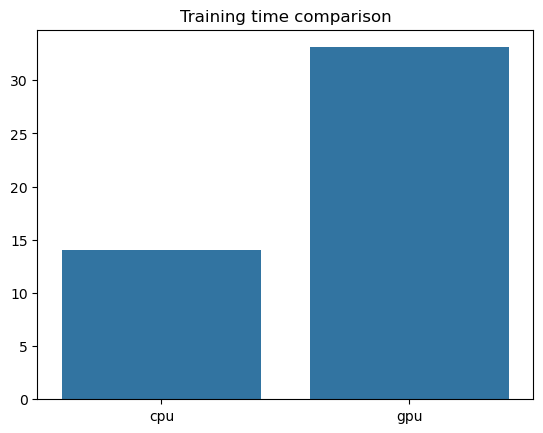

In [41]:
sns.barplot(x=['cpu', 'gpu'], y=[cpu_time, gpu_time])
plt.title("Training time comparison")
plt.show()

Further I'm going to use the model trained on cpu.

In [42]:
def evaluate(model, dataloader, loss_fn, device='cpu'):
    model.eval()
    model.to(device)
    total_loss = 0.0
    with torch.no_grad():
        for xb, yb in dataloader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            total_loss += loss_fn(preds, yb).item() * xb.size(0)
    return total_loss / len(dataloader.dataset)

In [43]:
cpu_train_mse = evaluate(model_cpu, train_dataloader, loss_fn)
cpu_test_mse = evaluate(model_cpu, test_dataloader, loss_fn)
cpu_val_mse = evaluate(model_cpu, val_dataloader, loss_fn)

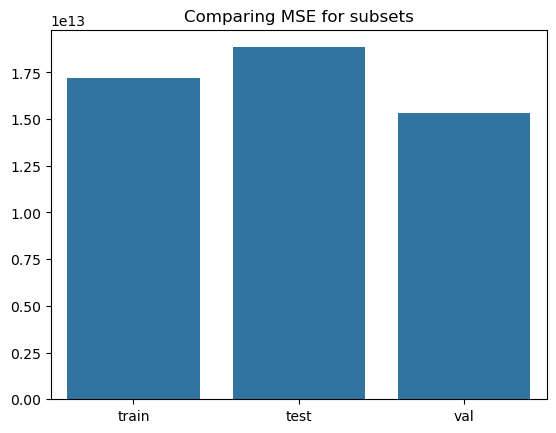

In [44]:
labels = ['train', 'test', 'val']
values = [cpu_train_mse, cpu_test_mse, cpu_val_mse]

sns.barplot(x=labels, y=values)
plt.title("Comparing MSE for subsets")
plt.show()

# Results summary

Random forest regressor turned out to be the best solution for the problem, where SVR was the worst.

Model: Random forest regressor	-> MSE: 2503548057469.0054
Model: Linear regression - gradient descent	-> MSE: 18831432382004.258
Model: Linear regression - pytorch	-> MSE: 18845391363057.098
Model: Linear regression - sklearn	-> MSE: 18896185035000.156
Model: Linear regression - closed formula	-> MSE: 18896185035000.164
Model: SVR	-> MSE: 24663622486880.85


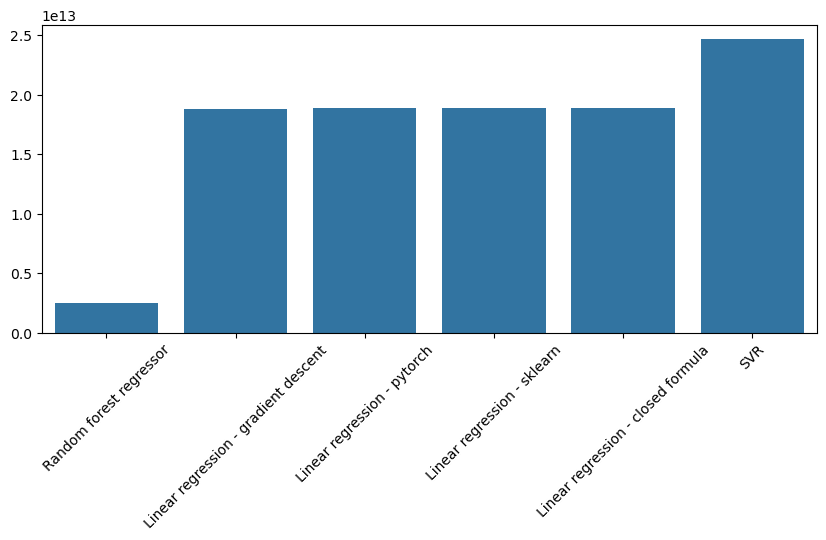

In [45]:
results_mse = {
    "Linear regression - sklearn": linreg_sk_mse,
    "Random forest regressor": rfr_mse,
    "SVR": svr_mse,
    "Linear regression - closed formula": linreg_cf_mse,
    "Linear regression - gradient descent": linreg_gd_mse,
    "Linear regression - pytorch": cpu_test_mse}

keys = list(results_mse.keys())
values = list(results_mse.values())
sorted_value_index = np.argsort(values)
sorted_results = {keys[i]: values[i] for i in sorted_value_index}

for key, value in sorted_results.items():
  print(f"Model: {key}\t-> MSE: {value}")

plt.figure(figsize=(10,4))
sns.barplot(x=sorted_results.keys(), y=sorted_results.values())
plt.xticks(rotation=45)
plt.show()